#            19BIO103 INTELLIGENCE IN BIOLOGICAL SYSTEMS-1
#                              FIRST SEMESTER PROJECT
#                TOPIC:DISTRICTWISE COVID-19 ANALYSIS

BY:
  AIEA.35072 RAHUL G, AIEA.33429 RISHI KARTHIGAYAN S, AIEA.10685 ROHAN SANJEEV, AIEA.17325 N T SHRISH SURYA

In [1]:
# To import packages to analyse and plot the graphs.  
from plotly import graph_objects as go
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# To import the dataset in .csv format using the pandas library.
dataset=pd.read_csv('districtwise_statistics.csv')

In [3]:
# To print the first 5 entries of the table.
dataset.head()

,Sno,District,Total Positive,Discharged,Active Cases,Deaths
0,1.0,Ariyalur,4663,4602,12,49
1,2.0,Chengalpattu,50922,49814,351,757
2,3.0,Chennai,229238,223230,1939,4069
3,4.0,Coimbatore,53691,52433,595,663
4,5.0,Cuddalore,24858,24524,50,284


In [4]:
# To print the last 5 entries of the table .
dataset.tail()

,Sno,District,Total Positive,Discharged,Active Cases,Deaths
36,37.0,Virudhunagar,16509,16219,59,231
37,38.0,Airport Sur,940,928,11,1
38,39.0,Airport Sur,1031,1025,5,1
39,40.0,Railway Su,428,428,0,0
40,NaN,Grand Total,831323,813326,5725,12272


In [5]:
# To analyse the shape of the dataset inorder to remove unwanted attributes.
dataset.shape

(41, 6)

In [6]:
# To discard first column of dataset.
new_dataset=dataset.drop(['Sno'],axis=1)  
 
new_dataset.tail()

,District,Total Positive,Discharged,Active Cases,Deaths
36,Virudhunagar,16509,16219,59,231
37,Airport Sur,940,928,11,1
38,Airport Sur,1031,1025,5,1
39,Railway Su,428,428,0,0
40,Grand Total,831323,813326,5725,12272


In [7]:
# To take into consideration each district once and to avoid repetitions.
new_dataset['District'].unique()

array([' Ariyalur', ' Chengalpattu', ' Chennai', ' Coimbatore',
       ' Cuddalore', ' Dharmapu', ' Dindigul', ' Erode', ' Kallakurichi',
       ' Kancheepuram', 'Kanniyakumari', ' Karur', ' Krishnagiri',
       ' Madurai', ' Nagapattinam', ' Namakkal', ' Nilgiris',
       'Perambalur', ' Pudukkottai', ' Ramanathapuram', 'Ranipet',
       'Salem', 'Sivagangai', 'Tenkasi', 'Thanjavur', 'Theni',
       'Thootukudi', 'Tiruchirappalli', 'Tirunelveli', 'Tirupathur',
       'Tiruppur', 'Tiruvallur', 'Tiruvannamalai', 'Tiruvarur', 'Vellore',
       'Villupuram', 'Virudhunagar', 'Airport Sur', 'Railway Su',
       'Grand Total'], dtype=object)

In [8]:
# To drop last row of datset. 
new_dataset=new_dataset.drop([40])
new_dataset.tail() 

,District,Total Positive,Discharged,Active Cases,Deaths
35,Villupuram,15115,14961,44,110
36,Virudhunagar,16509,16219,59,231
37,Airport Sur,940,928,11,1
38,Airport Sur,1031,1025,5,1
39,Railway Su,428,428,0,0


In [9]:
# To describe the components of dataset such as mean, standard deviation, maximum count, etc.,
df=new_dataset.describe()
df

,Total Positive,Discharged,Active Cases,Deaths
count,40.000000,40.000000,40.000000,40.000000
mean,20783.075000,20333.150000,143.125000,306.800000
std,35928.052486,34988.483403,311.170675,636.832273
min,428.000000,428.000000,0.000000,0.000000
25%,7891.000000,7719.500000,39.000000,109.750000
50%,14303.000000,14018.500000,58.500000,157.000000
75%,17998.750000,17593.250000,128.500000,263.500000
max,229238.000000,223230.000000,1939.000000,4069.000000


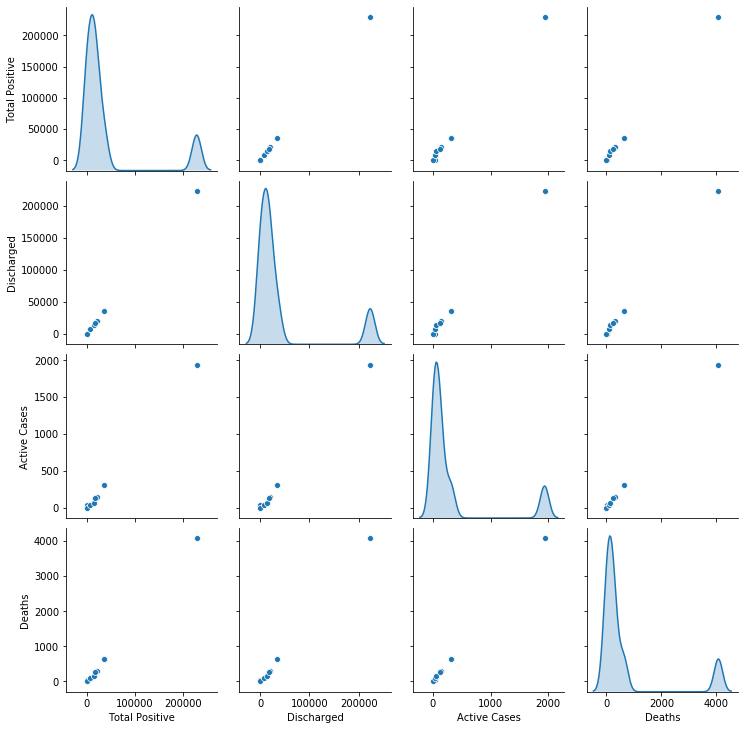

In [10]:
# This Pairplot describes mean, standard deviation, maximum count, etc for each attribute.
sns.pairplot(df,diag_kind="kde")

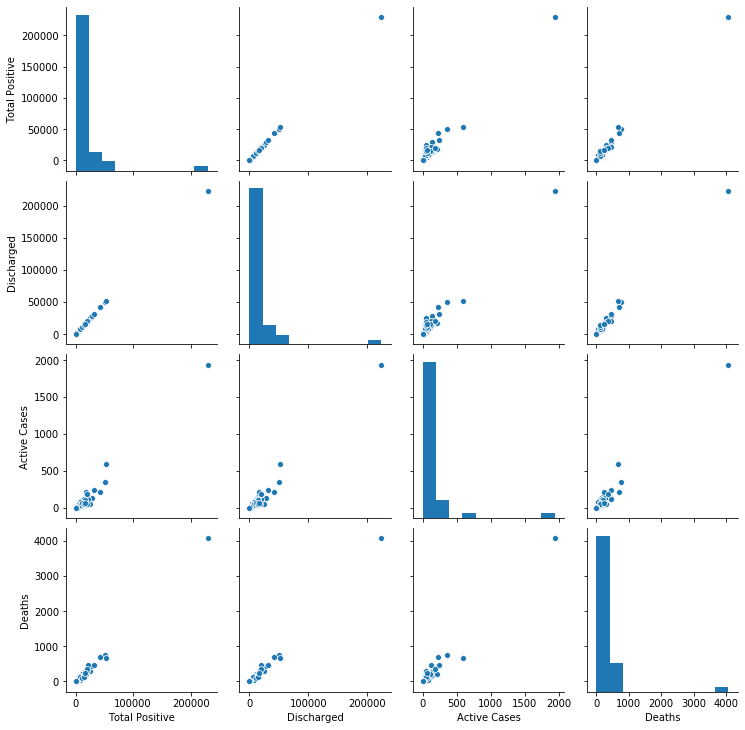

In [11]:
# Pairplot to obtain plots of the new statistical data set after removing grand total.
sns.pairplot(new_dataset)

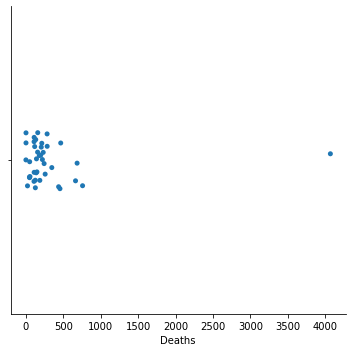

In [12]:
# Catplot for the number of deaths as the x co-ordinate axis.
sns.catplot(x='Deaths', data=new_dataset)

In [13]:
# Parallel co-ordinates plot for the attributes of Total positive cases, Disharged cases, Active cases and Deaths as labels
fig = px.parallel_coordinates(dataset, color='Sno',labels={"Total Positive": "Total Positive",
                "Discharged": "Discharged", "Active Cases": "Active Cases",
                "Deaths": "Deaths",},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [14]:
# Basic Funnel plot with the y-axis attributes as Total positive cases, Discharged cases, Active cases and Deaths for 
# the districts Chennai and Coimbatore
dataset.iloc[3]
fig = go.Figure()

fig.add_trace(go.Funnel(
    name="Chennai",
    y = ["Total Positive", "Discharged", "Deaths", "Active Cases"],
    x = [229238,223230,4069,1939],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name="Coimbatore",
    y = ["Total Positive", "Discharged", "Deaths", "Active Cases",],
    x = [53691,52433,663,595],
    textposition = "inside",
    textinfo = "value+percent total"))    

fig.show()

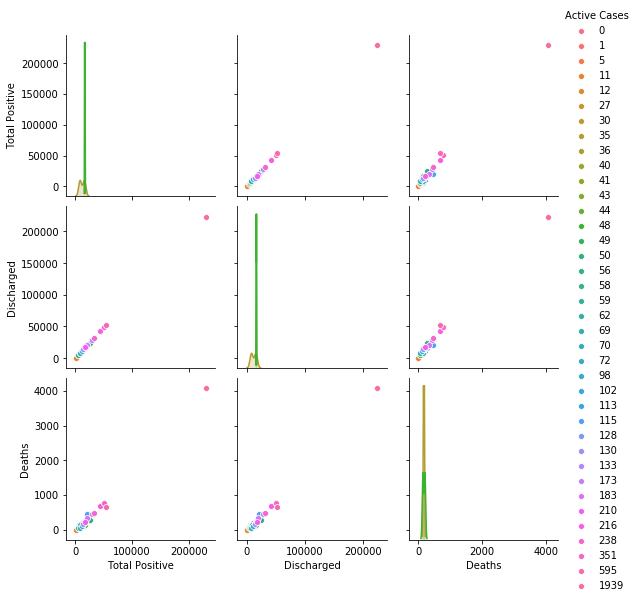

In [15]:
# Pairplot(Scatter plot) to obtain plots for the new statistical data set with the aspect of active cases.
sns.pairplot(new_dataset,hue='Active Cases')

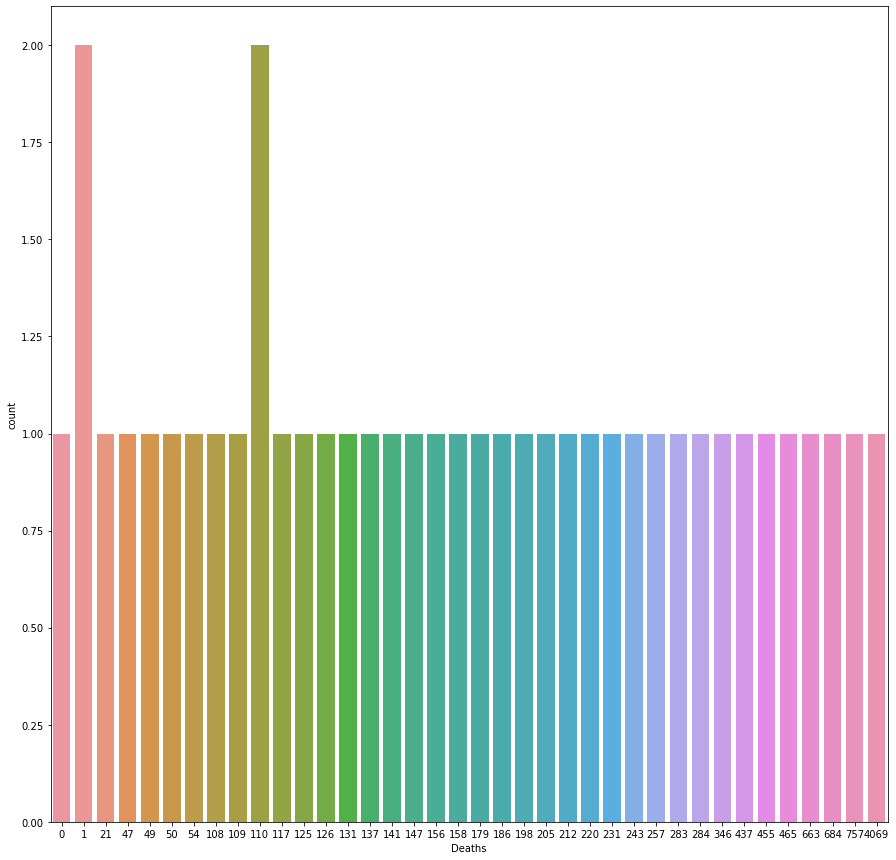

In [16]:
# Countplot for the no.of.deaths of the required size.
plt.figure(figsize=(15,15))
sns.countplot('Deaths',data=new_dataset)

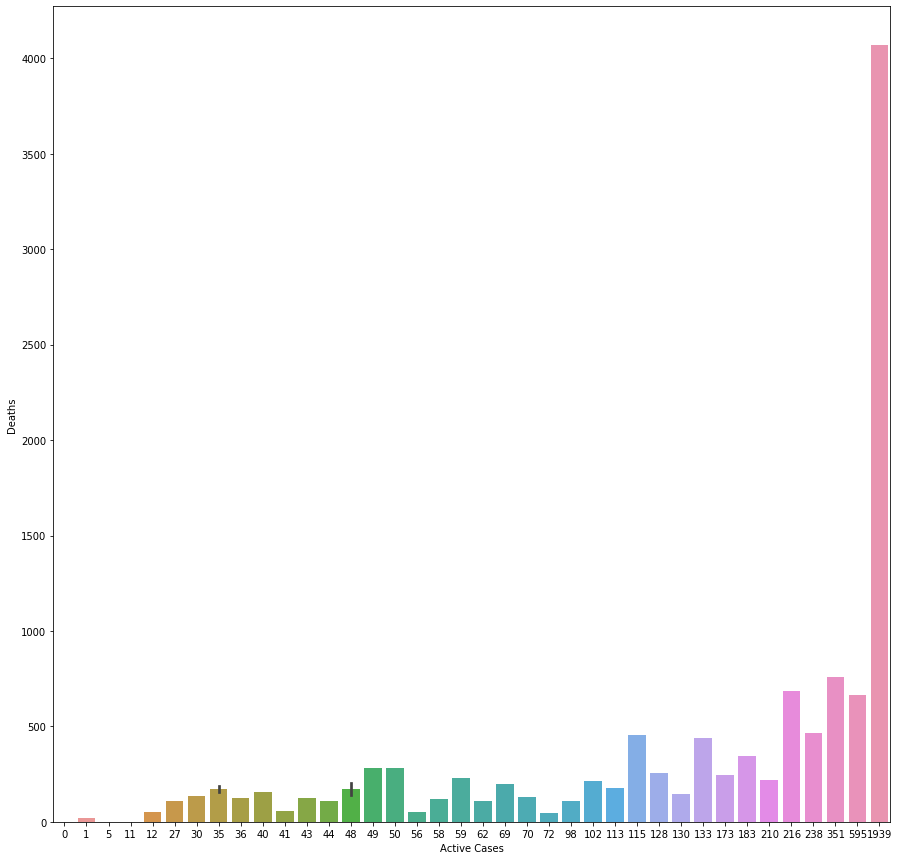

In [17]:
# Barplot for Active Cases V/S Deaths of the required size.
plt.figure(figsize=(15,15))
sns.barplot(x='Active Cases',y='Deaths',data=new_dataset)

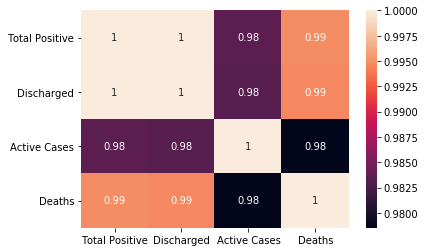

In [18]:
# To plot the heatmap w.r.t the correlated statistical data set with annotations.
corelation=new_dataset.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

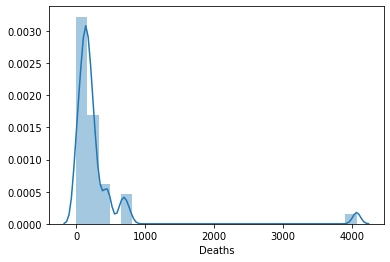

In [19]:
# Distplot for the no.of.deaths with the no.of.bins as 25 and kernel density estimation line
sns.distplot(new_dataset['Deaths'],bins=25)

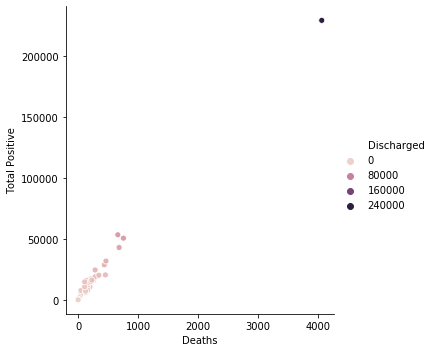

In [20]:
# Relation plot for the no.of.deaths V/S Total positive cases with the key as Disharged cases
sns.relplot(x='Deaths',y='Total Positive',hue='Discharged', data=new_dataset)